# **Rendu Hexanôme 4243**
**MINGH, DUC, QI**

# **Partie 0: Introduction**

**Ce jeu de données contient les prix de vente des maisons pour le King County, qui comprend Seattle. Il comprend les maisons vendues entre mai 2014 et mai 2015. Nous allons utiliser plusieurs modèles de machine learning pour prédire le prix des maisons.**

In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


# **Partie 1 : Traitement et visualisation des données**

**Dans un premier temps, nous faisons la lecture des données et affichons les cinq premiers valeurs. Nous constatons bien 21 colonnes ainsi que la signification de chaque variable. Par exemple, 'date' représente la date de vente, 'bedrooms' représente la quantité de chambres, 'lat' et  'long' représentent la position GPS.**

In [2]:
#lecture des données avec Pandas
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
#afficher les premières cinq lignes 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Afin de faciliter notre recherche suivante, nous voulons savoir le type de chaque attribut. Il existe une colonne qui s'appelle 'date', son type est 'object'. Nous ne pouvons pas faire la régression avec ce type, il est nécessaire de faire la conversion de type pour quantifier cette colonne.**

In [3]:
#afficher le type des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

 **Nous choisissons de la diviser en trois nouvelles colonnes, 'year', 'month' et 'day'. Parce que nous pouvons obtenir plus d'informations, nous pouvons connaître une tendance des prix plus précise en fonction de nouvelles variables.**

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop("date",axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


**De plus, il n'y a pas de valeurs nulles dans nos données, nous n'avons pas besoin de faire des traitements supplémentaires.**

In [5]:
#compter le nombre null pour chaque colonne
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

**Nous calculons les statistiques afin d'avoir une vue sur la distribution des données. Nous prenons l'exemple de la variable 'sqft_living15'.**

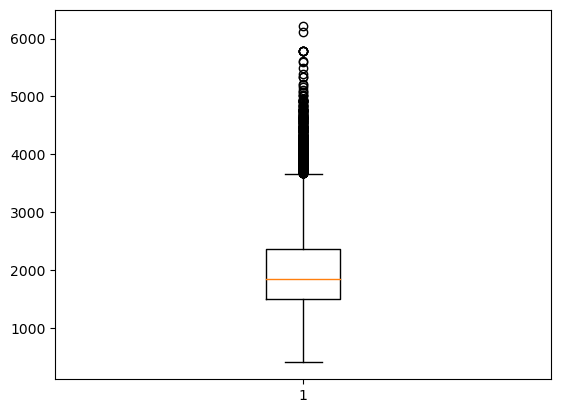

In [6]:
#Visualiser la distribution
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(df['sqft_living15'])
plt.show()

(array([3.000e+00, 3.100e+01, 2.780e+02, 1.064e+03, 2.205e+03, 3.171e+03,
        2.844e+03, 2.537e+03, 2.206e+03, 1.664e+03, 1.389e+03, 1.147e+03,
        8.690e+02, 6.690e+02, 4.660e+02, 3.280e+02, 2.330e+02, 1.700e+02,
        1.160e+02, 7.400e+01, 4.500e+01, 4.000e+01, 3.000e+01, 1.400e+01,
        6.000e+00, 3.000e+00, 3.000e+00, 6.000e+00, 0.000e+00, 2.000e+00]),
 array([ 399. ,  592.7,  786.4,  980.1, 1173.8, 1367.5, 1561.2, 1754.9,
        1948.6, 2142.3, 2336. , 2529.7, 2723.4, 2917.1, 3110.8, 3304.5,
        3498.2, 3691.9, 3885.6, 4079.3, 4273. , 4466.7, 4660.4, 4854.1,
        5047.8, 5241.5, 5435.2, 5628.9, 5822.6, 6016.3, 6210. ]),
 <BarContainer object of 30 artists>)

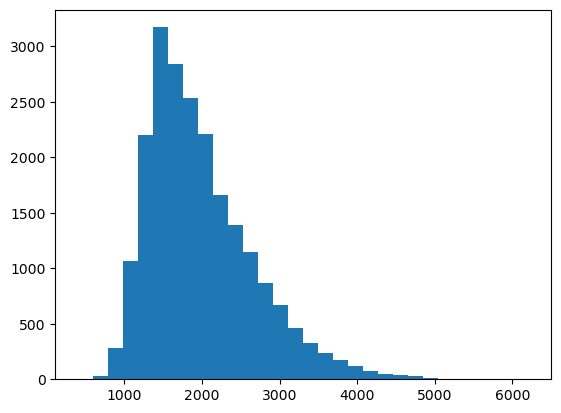

In [7]:
plt.hist(df['sqft_living15'], bins = 30)

**Il existe beaucoup de valeurs aberrantes sur la figure box-plot, mais nous ne voulons pas les supprimer directement. Par ailleurs, certaines variables ne suivent pas la distribution normale, il existe un décalge à gauche ou à droite. Nous gardons ces données après avoir appliqué une transformation. Nous allons utiliser la méthode Box-Cox pour ajuster la distribution pour certaines variables et aussi la transformation logarithmique qui est aussi utile.**

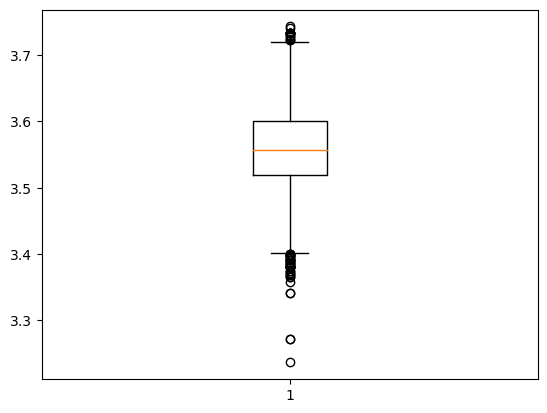

In [8]:
#Transformer les données avec Box-Cox
from scipy import stats
#from scipy.stats import norm, skew

df.sqft_living15,lambda_=stats.boxcox(df.sqft_living15)
plt.boxplot(df['sqft_living15'])
plt.show()

(array([1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 7.000e+00, 1.600e+01, 3.300e+01, 8.500e+01, 1.660e+02,
        3.390e+02, 6.510e+02, 9.710e+02, 1.582e+03, 2.191e+03, 2.415e+03,
        2.302e+03, 2.295e+03, 2.089e+03, 1.912e+03, 1.638e+03, 1.246e+03,
        8.120e+02, 4.700e+02, 2.460e+02, 1.060e+02, 2.500e+01, 1.100e+01]),
 array([3.236649  , 3.25352339, 3.27039777, 3.28727216, 3.30414654,
        3.32102092, 3.33789531, 3.35476969, 3.37164408, 3.38851846,
        3.40539285, 3.42226723, 3.43914162, 3.456016  , 3.47289038,
        3.48976477, 3.50663915, 3.52351354, 3.54038792, 3.55726231,
        3.57413669, 3.59101108, 3.60788546, 3.62475984, 3.64163423,
        3.65850861, 3.675383  , 3.69225738, 3.70913177, 3.72600615,
        3.74288054]),
 <BarContainer object of 30 artists>)

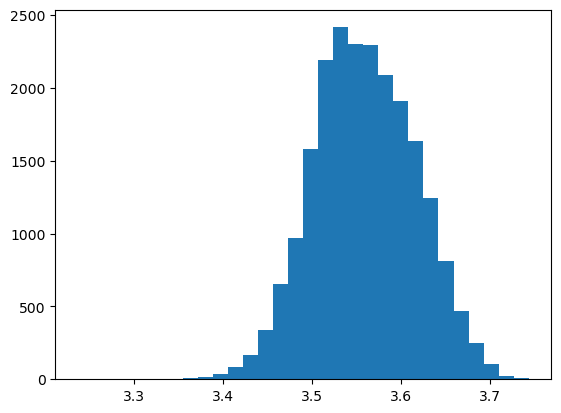

In [9]:
plt.hist(df['sqft_living15'], bins = 30)

**Après la transformation de Box-Cox, les erreurs non observables et les corrélations dans les variables prédictives peuvent être réduites dans une certaine mesure. La normalité, la symétrie et l'égalité de la variance des données peuvent être améliorées de manière significative.**

In [10]:
#df.sqft_living,lambda_=stats.boxcox(df.sqft_living)
#df.grade,lambda_=stats.boxcox(df.grade)
#df.sqft_above,lambda_=stats.boxcox(df.sqft_above)

(array([1.9884e+04, 9.2300e+02, 3.0400e+02, 1.0500e+02, 1.0200e+02,
        5.2000e+01, 1.9000e+01, 2.3000e+01, 2.7000e+01, 9.9000e+01,
        3.4000e+01, 6.0000e+00, 7.0000e+00, 6.0000e+00, 6.0000e+00,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([6.51000000e+02, 2.24147250e+04, 4.41784500e+04, 6.59421750e+04,
        8.77059000e+04, 1.09469625e+05, 1.31233350e+05, 1.52997075e+05,
        1.74760800e+05, 1.96524525e+05, 2.18288250e+05, 2.40051975e+05,
        2.61815700e+05, 2.83579425e+05, 3.05343150e+05, 3.27106875e+05,
        3.48870600e+05, 3.70634325e+05, 3.92398050e+05, 4.14161775e+05,
        4.35925500e+05, 4.57689225e+05, 4.79452950e+05, 5.01216675e+05,
        5.22980400e+05

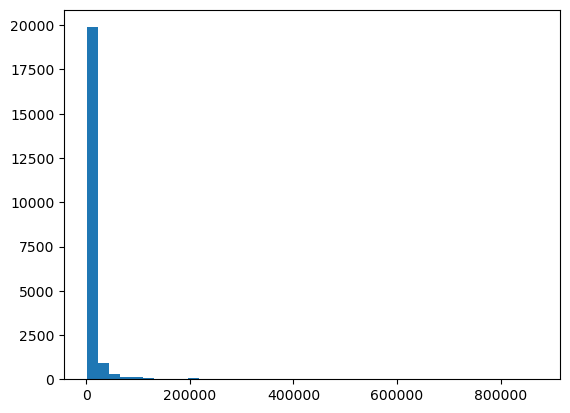

In [11]:
#Transformer les données avec la fonction logarithmique
import numpy as np
plt.hist(df['sqft_lot15'], bins = 40)

(array([3.600e+01, 4.760e+02, 5.210e+02, 3.750e+02, 1.157e+03, 3.946e+03,
        5.679e+03, 5.456e+03, 1.655e+03, 6.440e+02, 3.160e+02, 6.440e+02,
        2.310e+02, 1.360e+02, 1.060e+02, 7.500e+01, 1.350e+02, 1.900e+01,
        4.000e+00, 2.000e+00]),
 array([ 6.47850964,  6.8384655 ,  7.19842136,  7.55837722,  7.91833308,
         8.27828894,  8.6382448 ,  8.99820067,  9.35815653,  9.71811239,
        10.07806825, 10.43802411, 10.79797997, 11.15793583, 11.51789169,
        11.87784755, 12.23780341, 12.59775927, 12.95771513, 13.31767099,
        13.67762685]),
 <BarContainer object of 20 artists>)

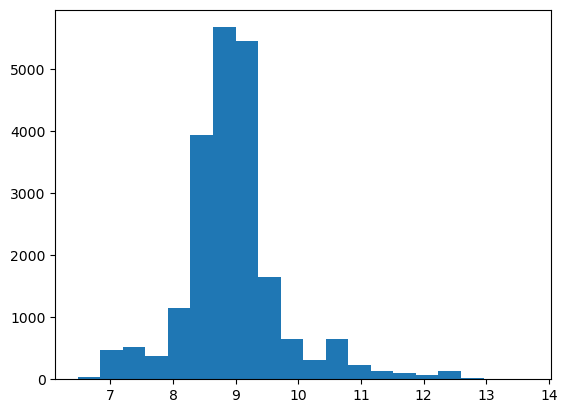

In [12]:
df.sqft_lot15 = np.log(df.sqft_lot15)
plt.hist(df['sqft_lot15'], bins = 20)

**La distribution de cette varaible est proche de la fonction expotentielle, nous essayons d'appliquer la fonction logaruthmique. Nous constatons bien cette transformation logarithmique rend la distribution plus similaire à la distribution normale. De plus, cette transformation ne change pas les corrélations entre les variables.**

**Option: Nous faisons aussi la noramalisation de nos données entre 0 et 1.**

In [13]:
#Normalisation entre 0 et 1
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#scaler.fit(df)
#df = scaler.transform(df)

**Après notre traitement de base, nous voulons étudier les statistiques. Notre objectif est de prédire le prix selon des attributs. De ce point de vue, nous voulons obtenir une prédiction de bonne qualité en choisissant les attributs qui ont une haute corrélation avec la variable 'price'.**

In [14]:
#classer les colonnes en calculant la corrélation
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
day             -0.014670
month           -0.010081
year             0.003576
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot         0.089661
yr_renovated     0.126434
sqft_lot15       0.147579
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.531448
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

**Pour les colonnes qui ont une corrélation très proche de zéro, nous les supprimons afin de ne pas influence la qualité de notre prédiction, parce que cela représente que cet attribut n'est pas pertinent au prix. Par exemple, 'id', 'day', 'month' et 'year'. Parce que 'id' est un peu aléatoire et c'est défini artificiellement, il n'existe pas une forte relation entre 'id' et le prix. Pour les variables sur la date, nous avons observé que c'était des données centrées en 2014 et 2015, c'est compréhensible que la corrélation est petite.
Nous classons et dessinons le heatmap pour mieux visuliser les corrélations.**

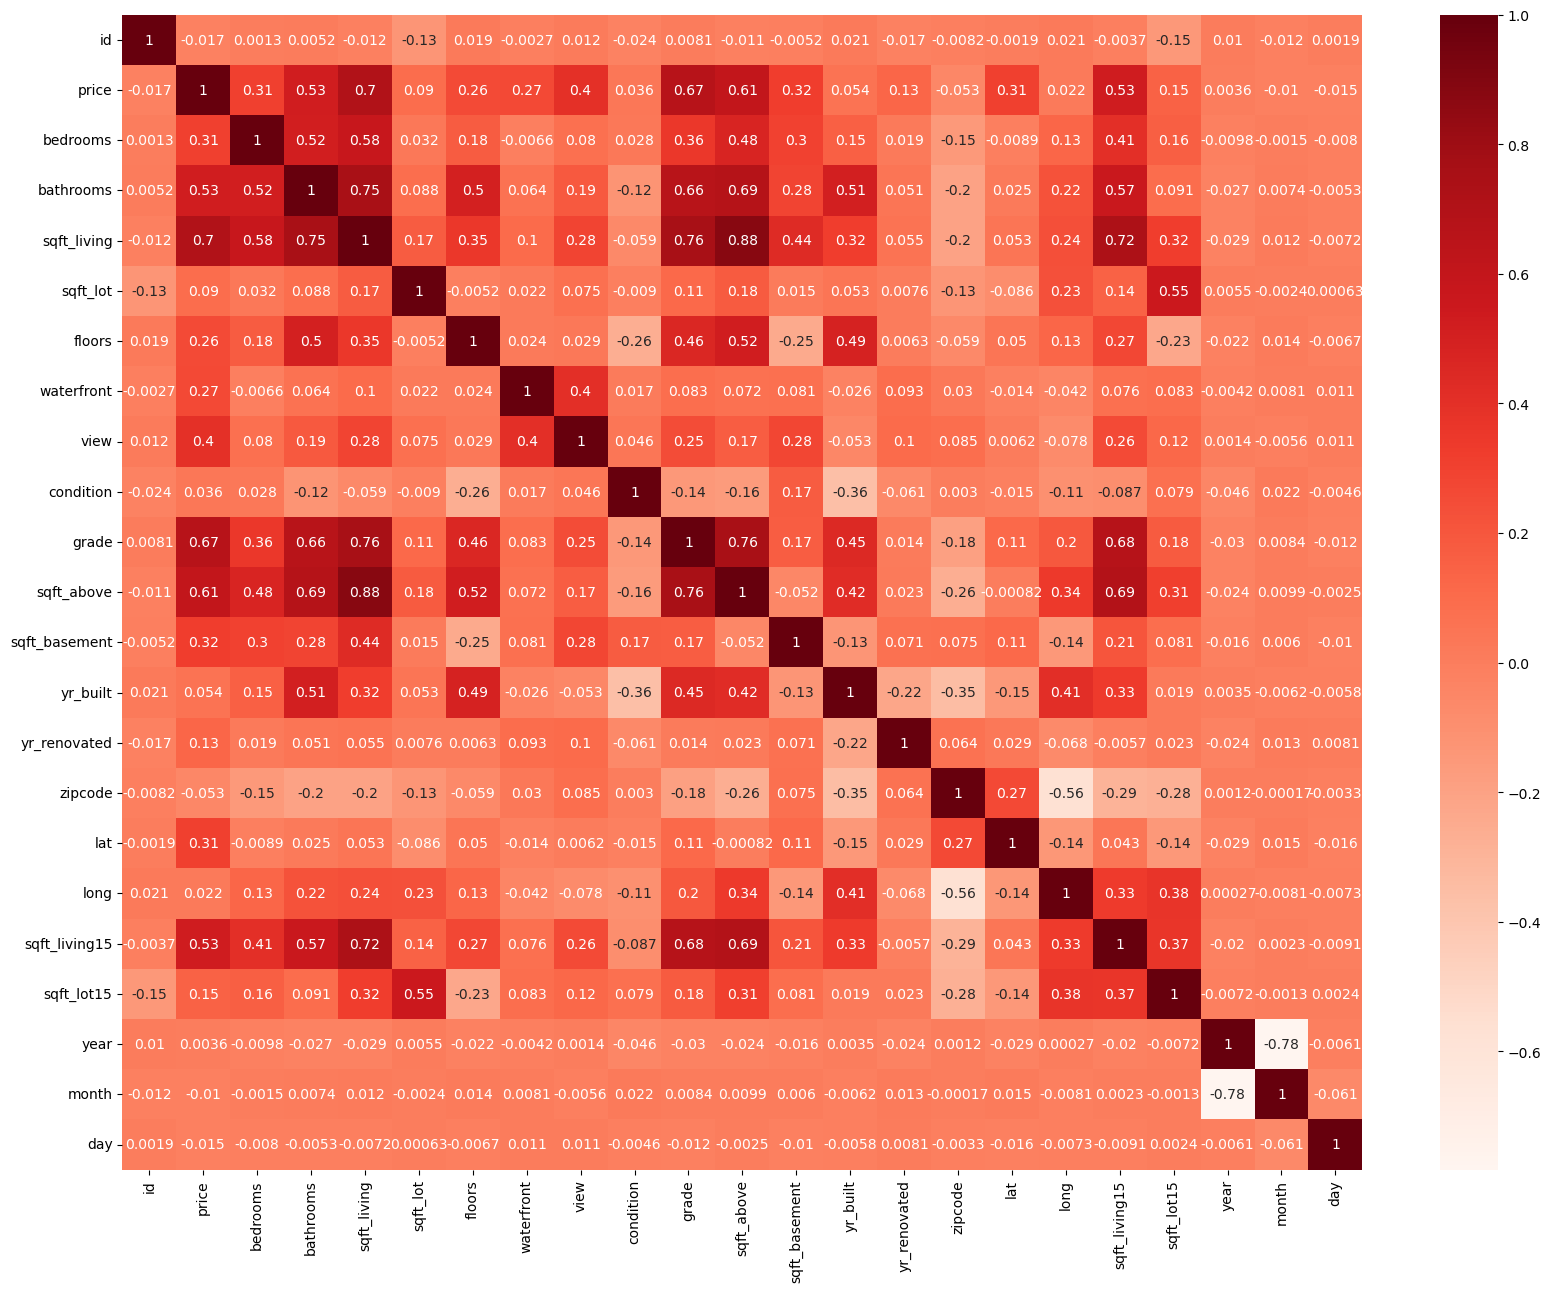

In [15]:
#Visuliser les corrélation entre chaque paires 
from matplotlib import pyplot as plt
import seaborn as sns
cor = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Pour garantir la qualité du modèle，nous supprimons les variables dont la corrélation est très faible. Il s'agit des variables "id", "day", "month" et "year", ainsi que de la variable "price", car c'est la variable que nous voulons prédire.**

In [16]:
X = df.drop('price',axis=1)
X = X.drop('id', axis=1)
X = X.drop('day', axis=1)
X = X.drop('month', axis=1)
X = X.drop('year', axis=1)
X_ex = X.head(20)
y_ex = df['price'].head(20)
X = X.values
y = df['price'].values

**Nous dessinons le heatmap dans la carte en fonction du prix afin d'avoir une première impression de nos données en réalité.**

<AxesSubplot:xlabel='long', ylabel='lat'>

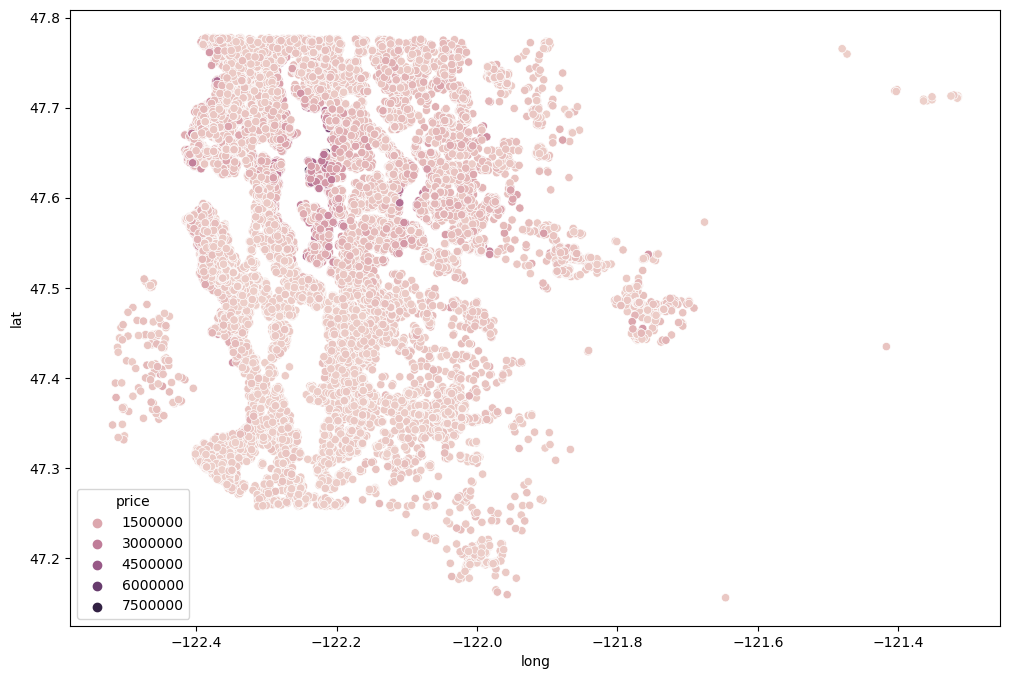

In [17]:
#Visualiser le prix selon la position GPS
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize  =(12,8))
sns.scatterplot(x = 'long', y = 'lat', data=df,hue = 'price')

**Jusqu'ici, nous avons fini notre traitement des données. Nous allons préparer notre première modèle, la régression linéaire.**

# Partie 2: Entraînement des différents modèles

**Faisant plusieurs régressions dans la suite, nous choisissons la K-fold cross validation, nous pouvons sélectionner le meilleur hyperparamètre dont nous avons besoin. Même si il n'y pas de hyperparamètres dans ce cas, elle nous aide à mieux entraîner notre modèle pour réduire la variance. Prémièrement, nous divisons nos données en deux parties, test et train avec la pondération 0.2 et 0.8 respectivement. Nous avons divisé l'ensemble d'entraînement en K parties égales. Nous prenons une partie en tant qu'un ensemble de validation et utilisons le reste des données comme ensemble d'entraînement. Cette opération est effectuée k fois et la moyenne (ou parfois le maximum) est calculée sur l'ensemble de validation. Enfin, pour chaque hyperparamètre, les moyennes des erreurs sont comparées afin de sélectionner le meilleur.**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape, X_test.shape)

(17290, 18) (4323, 18)


**Pour la régression linéaire, nous utilisons les moindres carrés pour déterminer les paramètres optimaux du modèle.**

In [19]:
#regression linéaire simple
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lin = LinearRegression()
kf = KFold(n_splits = 5,shuffle=True, random_state=0)
k1 = cross_val_score(lin, X_train, y_train, cv = kf)
s1 = 0
for i in range(5):
    s1 += k1[i]
s1 = s1/5
s1

0.6969189975367911

**Après avoir obtenu un modèle avec le meilleur paramètre sur l'ensemble d'entraînement, nous testons sur l'ensemble de test pour comparer avec les autres modèles. Finalement, nous pourrons choisir le meilleur modèle afin d'appliquer dans la vie en prédisant le prix des maisons.**

TEST - R2 score - Régression Linéaire:  0.7120055863673714


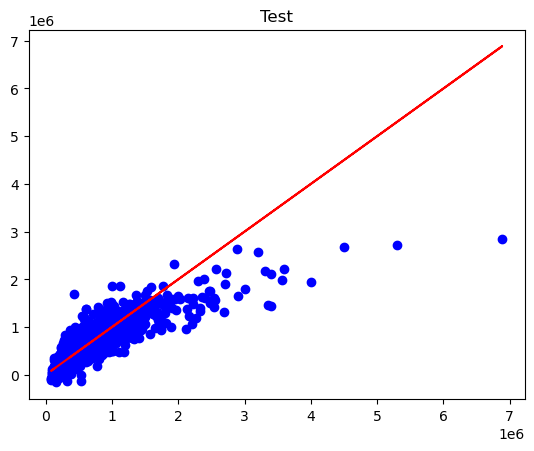

In [20]:
#Tester la performance sur l'ensemble de test
from sklearn.metrics import r2_score

lin.fit(X_train, y_train)
X_pred = lin.predict(X_test)
plt.scatter(y_test, X_pred, color="b")
plt.plot(y_test, y_test, color="r")
plt.title('Test')
r2_lin = r2_score(y_test,X_pred)
print('TEST - R2 score - Régression Linéaire: ', r2_lin)

**La régression linéaire est simple dans ce cas, la droite rouge dans la figure ci-dessus ne représente pas totalement la tendance et la distribution des nouvelles données. Il existe des points qui sont loins de la valeurs réelles. Nous allons implémenter les modèles plus complexe dans la suite.**

In [21]:
#Standarisation pour la ridge régression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
X_train[1], X_test[1]

(array([ 2.80226572,  2.11708195,  1.21288881, -0.24785681,  0.93572619,
        -0.08904033, -0.30976385, -0.62798657,  0.29233809,  1.70063557,
        -0.65955516,  1.08672746, -0.21174602, -0.66988337, -1.352893  ,
         0.77517047,  1.07950292, -0.39364733]),
 array([ 0.71037796,  0.19225727, -0.03914757, -0.14582064, -0.91136996,
        -0.07927746, -0.28943617, -0.63401029,  0.29025206, -0.4612224 ,
         0.80260821, -0.40884951, -0.20355196,  1.03122912,  1.24628995,
        -0.86060107,  0.05836208,  0.09527749]))

**Avant de commencer la régression ridge. La standarisation est nécessaire, parce que si les variables ne partagent pas la même échelle, l’intensité de
l’influence d’une variable sur la régularisation dépendrait de son échelle.**

0.6969530369422126


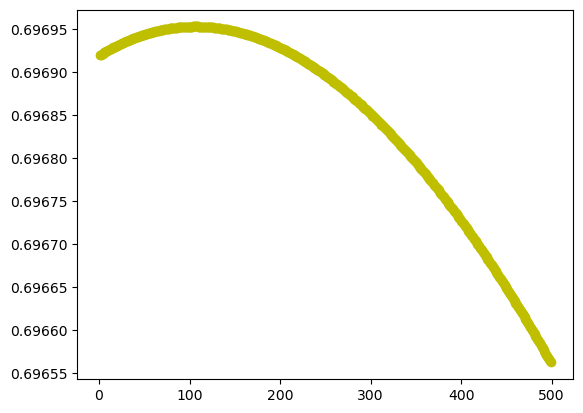

In [22]:
#Ridge regression en utilisant K-fold cross validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
def ridge_score(a):
    lin_rig = Ridge(alpha = a)
    kf = KFold(n_splits = 5,shuffle=True, random_state=0)
    k2 = cross_val_score(lin_rig, X_train, y_train, cv = kf)
    s2 = 0
    for i in range(5):
        s2 += k2[i]
    return s2/5

##Afficher le ridge trace
alpha = []
beta = []
for i in range(500):
    if i == 0:
        continue
    alpha.append(i)
    beta.append(ridge_score(i))
print(max(beta))
plt.scatter(alpha, beta, color="y")

**La valeur R2 ne change pas beaucoup, peut-être certaines lignes sont corrélées mais selon notre heat map, nous devrions plutôt dire que la régularisation n'est pas nécessaire pour nos données. Nous pourrions peut-être aussi considérer notre modèle linéaire, qui est assez simple. Le problème de sous-apprentissage nous apporte ce résultat, parce que quelle que soit la manière dont nous modifions le hyperparamètre, notre modèle ne représente pas particulièrement bien les données. Nous observons aussi que le changement de la valeur R2 respecte ce que nous pensons. Il augmente au début et une fois qu'il atteint la valeur optimal, la valeru R2 baisse de plus en plus. En effet, plus le paramètre de régularisation est grand, moins les paramètres du modèle sont importants. Nous accepterons donc un biais plus grand.**  

**Vu que nous avons presque vingts mille de données, nous allons utiliser la méthodes LOOCV avec SVD afin d'augmenter la vistesse de calcul. Pour un hyperparamère, nous pouvons obtenir notre modèle en calculant une seule fois sur l'ensemble d'entraînement, au lieu de k ou n fois.**

In [23]:
#Ridge regression en utilisant leave-one-out cross validation avec SVD 
from sklearn.linear_model import RidgeCV

list_alpha = [1e-5, 1e-3, 1e-1, 1, 10, 100, 1000, 100000]
lin_rig_svd = RidgeCV(alphas = list_alpha, gcv_mode = 'svd')
lin_rig_svd.fit(X_train, y_train)
lin_rig_svd.score(X_train, y_train)

0.6986931432690566

TEST - R2 score - Ridge Régression Linéaire:  0.712754317575427


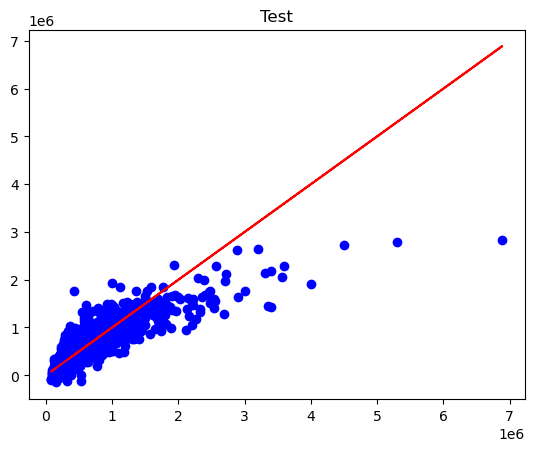

In [24]:
#Tester la performance

X_pred = lin_rig_svd.predict(X_test)
plt.scatter(y_test, X_pred, color="b")
plt.plot(y_test, y_test, color="r")
plt.title('Test')
r2_lin_svd = r2_score(y_test,X_pred)
print('TEST - R2 score - Ridge Régression Linéaire: ', r2_lin_svd)

**La régression ridge est un peu mieux que la régression linéaire, mais il n'y a pas beaucoup de différences. La régularisation n'est pas très utile dans notre cas.**

In [25]:
#from sklearn.dummy import DummyRegressor

#dummy_regr = DummyRegressor(strategy="median")
#kf_test1 = KFold(n_splits = 5,shuffle=True, random_state=0)
#k2_test1 = cross_val_score(dummy_regr, X_train, y_train, cv = kf_test1)
#s2_test1 = 0
#for i in range(5):
    #s2_test1 += k2_test1[i]
#s2_test1/5

**Nous voulons donc implémenter la régerssion ridge à noyau. Nous tranformons nos données avec la fonction gaussienne et nous entraînons notre modèle de la régression ridge avec ces données. Grâce à notre noyau non linéaire, nous obtenons un modèle non liéaire entre les variables et la valeur à prédire. De point de vue de la faisabilité, nous avons nombreux de données, le calcul prend un temps inacceptable. Nous allons utiliser l'approximation Nystroem en sélectionnant certaines données par hasard pour optimer le temps de calcul.**

In [26]:
#ridge regression à noyau
#from sklearn.kernel_ridge import KernelRidge

#rig_ker = KernelRidge(alpha = 1, kernel = 'rbf')
#kf_ker = KFold(n_splits = 5,shuffle=True, random_state=0)
#k2_ker = cross_val_score(rig_ker, X_train, y_train, cv = kf_ker)
#s2_ker = 0
#for i in range(5):
#    s2_ker += k2_ker[i]
#s2_ker/5

**Par rapport aux paramètres 'gamma' et 'n_components', nous choisissons 200 données dans un premier temps. Pour avoir un résultat plus précis, nous sélectionnons 500 données finalement. Le paramètre 'gamma' est initialisé à un sur le nombre de variable par défaut. Parce que il représente la varaince du noyau gaussien.**

APPRENTISSAGE - R2 score - Régression ridge à noyau:  0.7325165862485383


Text(0.5, 1.0, 'Test')

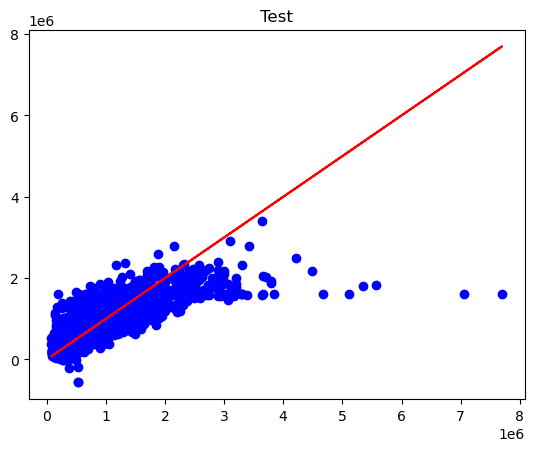

In [27]:
#ridge regression à noyau avec l'approximation nystroem
from sklearn.kernel_ridge import KernelRidge
from sklearn.kernel_approximation import Nystroem
feature_map_nystroem = Nystroem(n_components=500) # gamma = 1/ nb de variable, kernel = 'rbf'
X_trans = feature_map_nystroem.fit_transform(X_train)
list_alpha = [1e-8, 1e-5, 1e-3, 1e-1, 1, 10, 100, 1000]
rig_ker_nystr = RidgeCV(alphas = list_alpha)
rig_ker_nystr.fit(X_trans, y_train)
#rig_ker_nystr.score(X_train, y_train)
kf_ker = KFold(n_splits = 5,shuffle=True, random_state=0)
k2_ker = cross_val_score(rig_ker_nystr, X_trans, y_train, cv = kf_ker)
s2_ker = 0
for i in range(5):
    s2_ker += k2_ker[i]
r2_ker_nystr = s2_ker/5
print('APPRENTISSAGE - R2 score - Régression ridge à noyau: ', r2_ker_nystr)

X_pred = rig_ker_nystr.predict(X_trans)
plt.scatter(y_train, X_pred, color="b")
plt.plot(y_train, y_train, color="r")
plt.title('Test')

**Pour le test, nous n'avons pas réussi à implémenter. Nous remplaçons la valeur R2 sur l'ensemble de test par celle sur l'ensemble d'entraînement.**

In [28]:
#Tester la performance
#X_pred = rig_ker_nystr.predict(Nystroem(n_components = 500).fit_transform(X_test))
#plt.scatter(y_test, X_pred, color="b")
#plt.plot(y_test, y_test, color="r")
#r2_ker_nystr = r2_score(y_test, X_pred)
#r2_ker_nystr

**L'arbre de décision est principalement pour la classification, mais nous pouvons aussi adapter à notre problème de régression.S'il existe une diversité dans le modèle de variation entre les données, aucun modèle linéaire ne donnera de bons résultats. Nous avons donc voulu essayer une régression par arbre de décision. Tout d'abord, pour chaque variable, nous choisissons un point de coupure pour diviser l'ensemble d'apprentissage en deux parties et nous prenons la moyenne de chacune d'entre elles. Ensuite, pour chaque point de coupure, nous comparons la valeru MAE et sélectionnons le meilleur point de coupure. Enfin, nous comparons les meilleurs points de coupure pour chaque variable afin de déterminer la racine de l'arbre de décision. En répétant le processus ci-dessus, nous construisons notre arbre de décision.**

**En ce qui concerne les paramètres, nous choisissons le meilleur point de coupure selon la valeur MAE à chaque fois et un point de coupure divise l'ensemble d'apprentissage en deux parties par défaut. Dans un premier temps, nous ne limitons pas la profondeur de notre arbre de décision. Si nous rencontrons un problème de sur-apprentissage ou notre arbre de décision n'est pas efficace, nous changerons.**

In [29]:
#Arbre de décision
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)

kf_dt = KFold(n_splits = 5,shuffle=True, random_state=0)
k2_dt = cross_val_score(dt, X_train, y_train, cv = kf_dt)
s2_dt = 0
for i in range(5):
    s2_dt += k2_dt[i]
s2_dt/5

0.7416645727545449

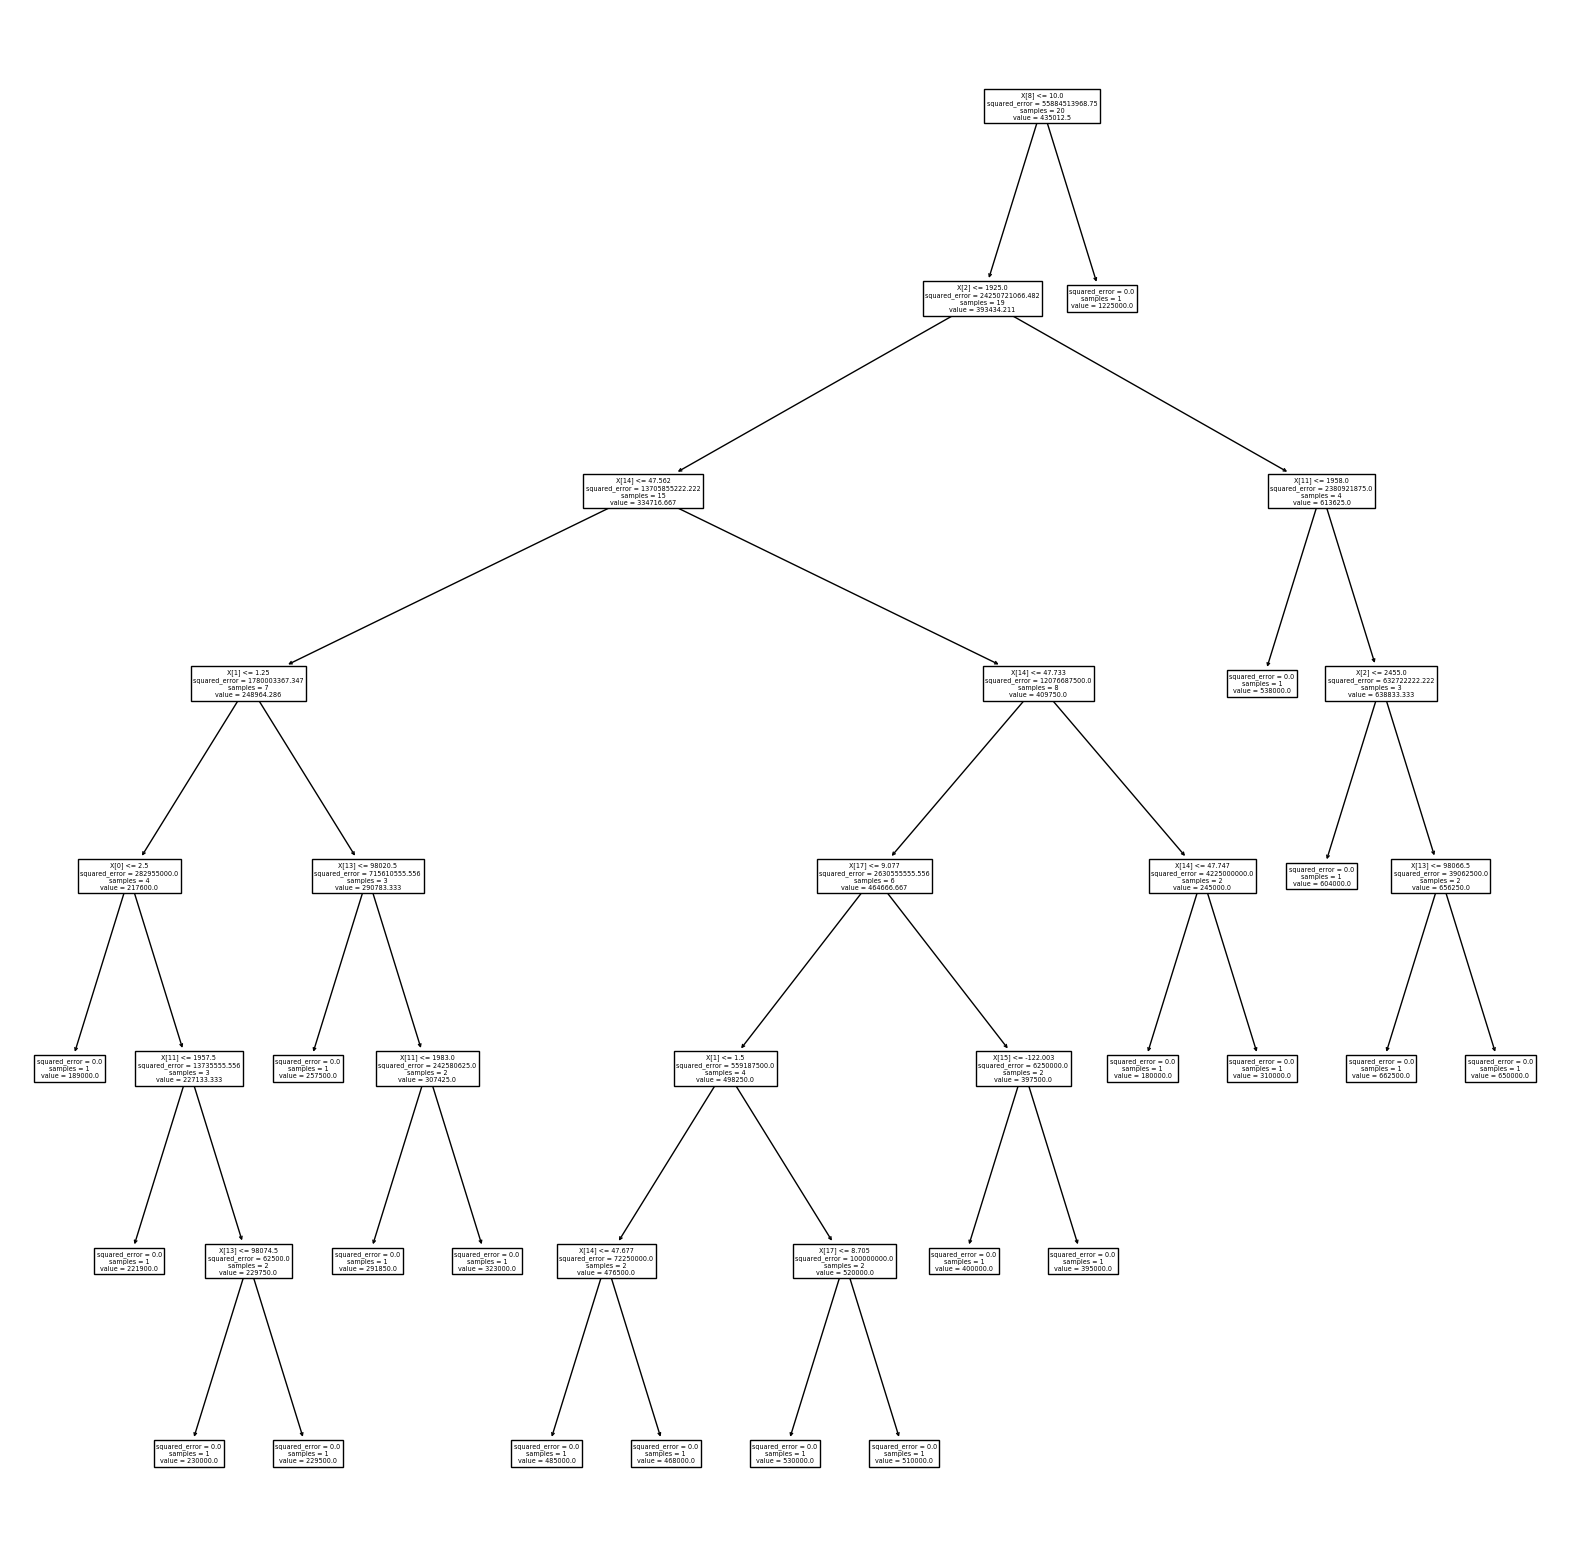

In [30]:
#Visualiser l'arbre de décision avec un sous-ensemble
dt_ex = DecisionTreeRegressor(random_state=0)
dt_ex.fit(X_ex,y_ex)
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt_ex);

TEST - R2 score - Arbre de décision:  0.7706007661783316


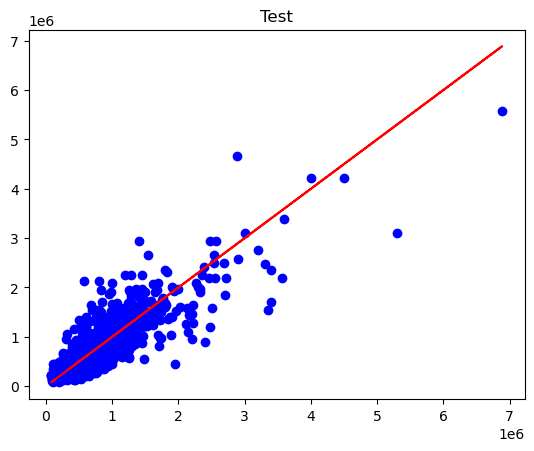

In [31]:
#Tester la performance
X_pred = dt.predict(X_test)
plt.scatter(y_test, X_pred, color="b")
plt.plot(y_test, y_test, color="r")
plt.title('Test')
r2_dt = r2_score(y_test, X_pred)
print('TEST - R2 score - Arbre de décision: ', r2_dt)

**L'algorithme forêt aléatoire résout ce problème en combinant les prédictions faites par plusieurs arbres de décision et en renvoyant un seul résultat. En raison de leur nature aléatoire, les forêts aléatoires sont efficaces pour réduire la variance du modèle. Nous voulons donc essayer l'approche de la forêt aléatoire.**

**Tout d'abord, nous déterminons le nombre d'arbres de décision à créer, N. Ensuite, nous sélectionnons au hasard K échantillons de données dans l'ensemble d'entraînement à l'aide de la méthode de Bootstrapping. Puis, nous utilisons ces K échantillons de données pour créer un arbre de décision. Enfin, nous répétons les étapes ci-dessus jusqu'à ce que nous ayons créé N arbres de décision. Comme il s'agit d'un problème de régression, la moyenne des N arbres de décision est considérée comme la prédiction finale.**

**En ce qui concerne la sélection des paramètres:**
* **max_samples : indique le nombre d'échantillons à tirer des données d'entraînement dans l'échantillonnage Bootstrap.** 
* **max_depth : indique la profondeur maximale de l'arbre, que nous spécifions si nécessaire.**
* **n_estimators : indique le nombre d'arbres de décision à créer dans le modèle de forêt aléatoire. Par défaut, il est de 100.**
* **Nous utilisons la valeur de MSE pour évaluer les arbres de décision par défaut.**

In [32]:
#Forêt aléatoire
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators = 10)
rf.fit(X_train,y_train)

kf_rf = KFold(n_splits = 5,shuffle=True, random_state=0)
k2_rf = cross_val_score(rf, X_train, y_train, cv = kf_rf)
s2_rf = 0
for i in range(5):
    s2_rf += k2_rf[i]
r2_rf = s2_rf/5
r2_rf

0.8567222406391581

TEST - R2 score - Forêt Aléatoire:  0.8584465351971878


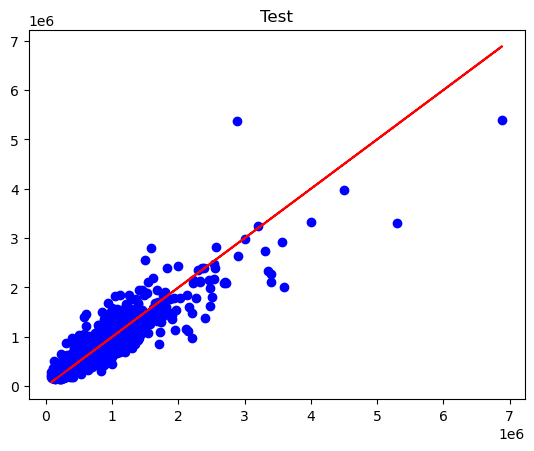

In [33]:
#Tester la performance
X_pred = rf.predict(X_test)
plt.scatter(y_test, X_pred, color="b")
plt.plot(y_test, y_test, color="r")
plt.title('Test')
r2_rf = r2_score(y_test, X_pred)
print('TEST - R2 score - Forêt Aléatoire: ', r2_rf)

**Nous obtenons une valeur R2 assez bonne, mais il existe peut-être un léger problème de sur-apprentissage. Parce que la valeur R2 sur le test est inférieur à celle de l'ensemble d'entraînement. C'est-à-dire que notre modèle n'adapte pas parfaitement des nouvelles données. C'est déjà notre meilleur modèle jusqu'à présent.**

**Nous voulons aussi implémenter le réseau de neurones avec tensorflow. Premèrement, nous construisons un réseau de quatre couches. Une couche d'entrée, une couche de sortie et deux couches cachées. Afin d'avoir un résultat précis, nous mettons 256 neurones dans chaque couche cachées. La fonction d'activation de la couche cachée et d'entrée est généralement celle qui ajoute un élément non linéaire à notre modèle, comme la fonction Sigmoide ou la fonction ReLu. Nous choisissons la fonction ReLu. Elle est émise lorsque le résultat de l'opération matricielle est positif, ou zéro s'il ne l'est pas. Pour une question de régression, la fonstion est souvent la fonction linéaire. Après avoir discuté avec les étudiants du même groupe, ils ont résolu le problème de la prédiction de la qualité du vin, qui est un problème de classification. Ils ont utilisé la fonction Softmax dans la couche de sortie pour rendre la prédiction probabiliste. Notre problème étant un problème de régression continue, cette fonction n'est pas utilisée dans notre cas.**

**L'itération et la rétropropagation sont des méthodes couramment utilisées dans les réseaux neurones pour déterminer les paramètres. À chaque itération, l'erreur entre la valeur prédite et la valeur réelle est utilisée pour ajuster les paramètres. L'erreur minimale est atteinte étape par étape.**
* **Nous utilisons la méthode de descente de gradient d'Adam, qui calcule non seulement la dérivée actuelle, mais prend également en compte les valeurs précédentes. La méthode d'Adam est plus rapide et plus précise lorsqu'il y a beaucoup de petites fluctuations dans la courbe. Dans cette méthode, c'est le taux d'apprentissage qu'il faut ajuster. Lorsque la valeur est trop élevée, la solution optimale risque d'être sautée. En revanche, lorsque la valeur est trop faible, la convergence est lente.**
* **Le critère que nous avons choisi est la valeur MAE. Par rapport à la valeur MSE, nous calculons la moyenne des valeurs absolues des différences au lieu de la moyenne des carrés des différences. C'est moins sensible aux erreurs élevées.**

In [34]:
#construire le model avec tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model = Sequential(
    [
        Dense(units=128, input_dim=X_train.shape[1], activation="relu"), #kernel_initializer='normal
        Dense(units=256, activation="relu"),
        Dense(units=256, activation="relu"),
        Dense(units=1, activation="linear"),
    ], name="kc_model"
)

In [35]:
X_train_numpy = np.array(X_train)
y_train_numpy = np.array(y_train)
X_train_numpy.shape

(17290, 18)

**Il y a nombreux de paramères que nous pouvons manipuler, nous avons choisi certains pour améliorer la qualité de notre modèle.**
* **epochs: représente le nombre d'itération**
* **batch_size: indique le nombre de données (échantillons) transmises au programme pour l'entraînement en une seule session**
* **validation_split: spécifie la proportion d'ensembles de validation à découper à partir de l'ensemble de données**

In [36]:
model.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

history = model.fit(
    X_train_numpy, y_train_numpy,
    epochs=50,
    batch_size=50,
    validation_split=0.2,
)

Epoch 1/50
277/277 [==============================] - 4s 5ms/step - loss: 177713.7344 - mean_absolute_error: 177713.7344 - val_loss: 108149.9609 - val_mean_absolute_error: 108149.9531
Epoch 2/50
277/277 [==============================] - 1s 5ms/step - loss: 107883.4297 - mean_absolute_error: 107883.4297 - val_loss: 102320.4219 - val_mean_absolute_error: 102320.4219
Epoch 3/50
277/277 [==============================] - 2s 5ms/step - loss: 105056.6562 - mean_absolute_error: 105056.6562 - val_loss: 100860.7500 - val_mean_absolute_error: 100860.7500
Epoch 4/50
277/277 [==============================] - 1s 5ms/step - loss: 104185.5625 - mean_absolute_error: 104185.5625 - val_loss: 102961.5391 - val_mean_absolute_error: 102961.5391
Epoch 5/50
277/277 [==============================] - 1s 4ms/step - loss: 103862.2344 - mean_absolute_error: 103862.2344 - val_loss: 99112.1328 - val_mean_absolute_error: 99112.1328
Epoch 6/50
277/277 [==============================] - 1s 4ms/step - loss: 103290.5

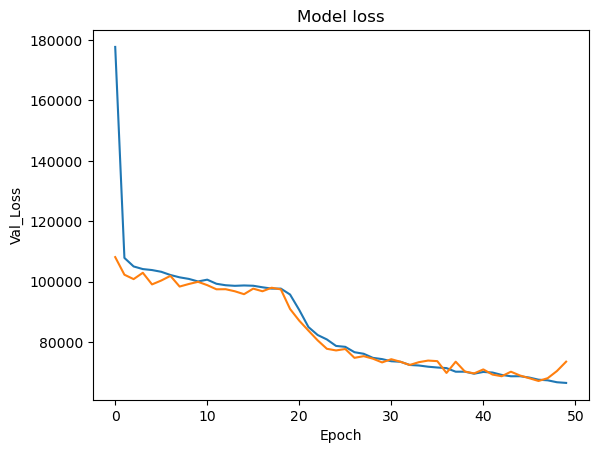

In [37]:
# Visualisation
from sklearn.metrics import r2_score

plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model loss')  
plt.ylabel('Val_Loss')  
plt.xlabel('Epoch')  
#plt.legend(['Train'], loc='upper left')  
plt.show()

# **LOSS**

136/136 [==============================] - 0s 2ms/step
TEST - R2 score - Réseau de neurones:  0.89058746568925


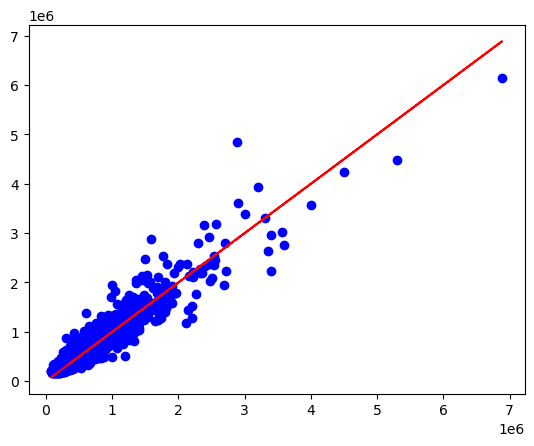

In [38]:
#Tester la performance
X_test_numpy = np.array(X_test)
y_test_numpy = np.array(y_test)
y_pred = model.predict(X_test_numpy)
y_pred = np.reshape(y_pred, (y_pred.shape[0],))
plt.scatter(y_test, y_pred, color="b")
plt.plot(y_test, y_test, color="r")
r2_nn = r2_score(y_test_numpy, y_pred)
print('TEST - R2 score - Réseau de neurones: ', r2_nn)

In [39]:
#from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#from math import sqrt

#RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
#MSE = mean_squared_error(y_test_orig, y_predict_orig)
#MAE = mean_absolute_error(y_test_orig, y_predict_orig)
#r2 = r2_score(y_test_orig, y_predict_orig)
#adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

#print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Partie 3: Conclusion

In [40]:
#Comparer les différents modèles
print('TEST - R2 score - Régression Linéaire: ', r2_lin)
print('TEST - R2 score - Ridge Régression Linéaire: ', r2_lin_svd)
print('APPRENTISSAGE - R2 score - Régression ridge à noyau: ', r2_ker_nystr)
print('TEST - R2 score - Arbre de décision: ', r2_dt)
print('TEST - R2 score - Forêt Aléatoire: ', r2_rf)
print('TEST - R2 score - Réseau de neurones: ', r2_nn)

TEST - R2 score - Régression Linéaire:  0.7120055863673714
TEST - R2 score - Ridge Régression Linéaire:  0.712754317575427
APPRENTISSAGE - R2 score - Régression ridge à noyau:  0.7325165862485383
TEST - R2 score - Arbre de décision:  0.7706007661783316
TEST - R2 score - Forêt Aléatoire:  0.8584465351971878
TEST - R2 score - Réseau de neurones:  0.89058746568925


**En comparant les valeurs R2 de différents modèles, l'approche réseau de neurones nous donne la meilleur qualité de la prédiction sur les données.**

**NAS, Mercer, apprentissage && usage, variables binaires & qualité**

# FIN DU RAPPORT

**Lien du notebook: https://www.kaggle.com/code/jiaqiqi/notebook2b95b72d8d/edit/run/124671760**